In [3]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Driven With Fixed Point (Stable Node):

In [22]:
def f(t, z, gamma, rho, sigma, eta, u0, w1, w2):
    r1, r2, m12, m21 = z
    z_next = np.zeros(4)
    z_next[0] = gamma*(-r1 + np.tanh(rho*m12*r2 + sigma*w1*(u0*np.exp(-0.1*t)+1000)))
    z_next[1] = gamma*(-r2 + np.tanh(rho*m21*r1 + sigma*w2*(u0*np.exp(-0.1*t)+1000)))
    z_next[2] = z_next[3] = eta*r1*r2
    return z_next

In [23]:
r10 = r20 = 0
w1 = 0.1
w2 = 0
m120 = 0
m210 = 5  
t_span = [0, 100]
z0 = [r10, r20, m120, m210]
params=(10, 0.9, 0.01, 1e-5, 100, w1, w2)
sln = solve_ivp(f, t_span, z0, args=params, dense_output=True)
t = np.linspace(0, 100, 10000)
z = sln.sol(t)

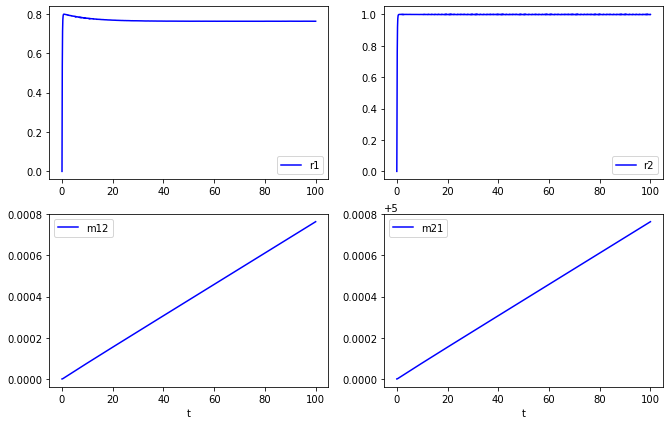

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11,7))
ax1.plot(t , z[0], "b-", label='r1')
ax2.plot(t , z[1], "b-", label='r2')
ax3.plot(t , z[2], "b-", label='m12')
ax4.plot(t , z[3], "b-", label='m21')
    
ax3.set_xlabel("t")
ax4.set_xlabel("t")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [26]:
@widgets.interact(t_end=(0, 10000, 10))
def update(t_end=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,7))
    ax1.plot(z[0][:t_end], z[1][:t_end])
    ax2.plot(t[:t_end], 100*np.exp(-0.1*t[:t_end]))
    ax1.set_xlim(0, 2)
    ax1.set_ylim(0, 2)
    ax2.set_xlim(0, 100)
    ax2.set_ylim(0, 100)

interactive(children=(IntSlider(value=0, description='t_end', max=10000, step=10), Output()), _dom_classes=('w…

## Driven With Fixed Point (Stable Spiral):

In [18]:
def f(t, z, gamma, rho, sigma, eta, u0, w1, w2):
    r1, r2, m12, m21 = z
    z_next = np.zeros(4)
    z_next[0] = gamma*(-r1 + np.tanh(rho*m12*r2 + sigma*w1*u0*np.exp(-0.1*t)*np.sin(t)))
    z_next[1] = gamma*(-r2 + np.tanh(rho*m21*r1 + sigma*w2*u0*np.exp(-0.1*t)*np.sin(t)))
    z_next[2] = z_next[3] = eta*r1*r2
    return z_next

In [19]:
r10 = r20 = 0
w1 = 0.1
w2 = 0
m120 = 0
m210 = 5  
t_span = [0, 100]
z0 = [r10, r20, m120, m210]
params=(10, 0.9, 0.01, 1e-5, 100, w1, w2)
sln = solve_ivp(f, t_span, z0, args=params, dense_output=True)
t = np.linspace(0, 100, 10000)
z = sln.sol(t)

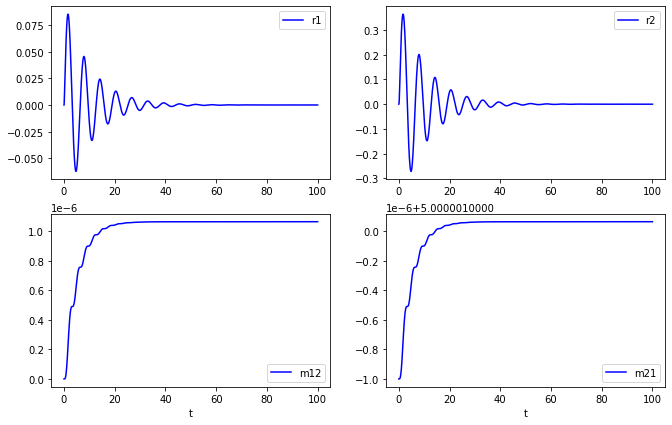

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11,7))
ax1.plot(t , z[0], "b-", label='r1')
ax2.plot(t , z[1], "b-", label='r2')
ax3.plot(t , z[2], "b-", label='m12')
ax4.plot(t , z[3], "b-", label='m21')
    
ax3.set_xlabel("t")
ax4.set_xlabel("t")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [21]:
@widgets.interact(t_end=(0, 10000, 10))
def update(t_end=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,7))
    ax1.plot(z[0][:t_end], z[1][:t_end])
    ax2.plot(t[:t_end], 100*np.exp(-0.1*t[:t_end])*np.sin(t[:t_end]))
    ax1.set_xlim(-0.11, 0.11)
    ax1.set_ylim(-0.3, 0.4)
    ax2.set_xlim(0, 100)
    ax2.set_ylim(-100, 100)

interactive(children=(IntSlider(value=0, description='t_end', max=10000, step=10), Output()), _dom_classes=('w…

## Driven With Periodic Orbit:

In [13]:
def f(t, z, gamma, rho, sigma, eta, u0, w1, w2):
    r1, r2, m12, m21 = z
    z_next = np.zeros(4)
    z_next[0] = gamma*(-r1 + np.tanh(rho*m12*r2 + sigma*w1*u0*np.cos(t)))
    z_next[1] = gamma*(-r2 + np.tanh(rho*m21*r1 + sigma*w2*u0*np.cos(t)))
    z_next[2] = z_next[3] = eta*r1*r2
    return z_next

In [14]:
r10 = r20 = 0
w1 = 0.1
w2 = 0
m120 = 0
m210 = 5  
t_span = [0, 100]
z0 = [r10, r20, m120, m210]
params=(10, 0.9, 0.01, 1e-5, 100, w1, w2)
sln = solve_ivp(f, t_span, z0, args=params, dense_output=True)
t = np.linspace(0, 100, 10000)
z = sln.sol(t)

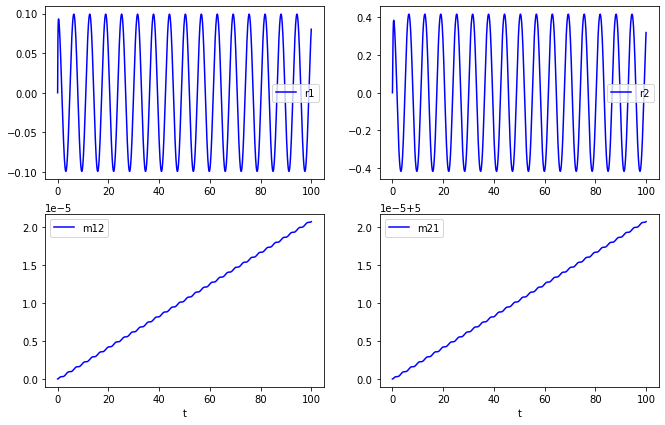

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11,7))
ax1.plot(t , z[0], "b-", label='r1')
ax2.plot(t , z[1], "b-", label='r2')
ax3.plot(t , z[2], "b-", label='m12')
ax4.plot(t , z[3], "b-", label='m21')
    
ax3.set_xlabel("t")
ax4.set_xlabel("t")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [19]:
@widgets.interact(t_end=(0, 10000, 10))
def update(t_end=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,7))
    ax1.plot(z[0][:t_end], z[1][:t_end])
    ax2.plot(t[:t_end], 100*np.cos(t[:t_end]))
    ax1.set_xlim(-0.11, 0.11)
    ax1.set_ylim(-0.45, 0.45)
    ax2.set_xlim(0, 100)
    ax2.set_ylim(-105, 105)

interactive(children=(IntSlider(value=0, description='t_end', max=10000, step=10), Output()), _dom_classes=('w…